In [12]:
import json
import itertools
import numpy as np 
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 

In [13]:
washington_file = "./washington_heatmap.json"
montreal_file = "./montreal_heatmap.json"
wien_file = "./wien_heatmap.json"

with open(washington_file) as f:
    washington_data = json.load(f)
with open(montreal_file) as f:
    montreal_data = json.load(f)
with open(wien_file) as f:
    wien_data = json.load(f)

In [14]:
def generate_heatmaps(data):
    heatmaps = []
    for station in data['stations']:
        middle = station['pos']
        x_coords = [middle[0] - 3, middle[0] - 2, middle[0] - 1, middle[0], middle[0] + 1, middle[0] + 2, middle[0] + 3]
        y_coords = [middle[1] - 3, middle[1] - 2, middle[1] - 1, middle[1], middle[1] + 1, middle[1] + 2, middle[1] + 3]
        
        data = []
        for i, coords in enumerate(itertools.product(x_coords, y_coords)):
            if i % 7 == 0:
                data.append([])
            if f'({coords[0]}, {coords[1]})' in station['heatmap']:
                data[-1].append(station['heatmap'][f'({coords[0]}, {coords[1]})'])
            else:
                data[-1].append(np.nan)

        print('Neighbors:')
        for neighbor in station['neighbors']:
            print(f'Station ID: {neighbor["station_id"]}, Pos: {neighbor["position"]}, Distance: {neighbor["distance"]:.2f} at Angle {neighbor["angle"]}')
        print(f'Average closest coords: {station["average_closest_coords"]}')

        heatmapDataFrame = DataFrame(data, index=x_coords, columns=y_coords)
        heatmaps.append((heatmapDataFrame,len(station['neighbors'])) )
        ax = sns.heatmap(heatmapDataFrame, annot=True, fmt=".1f")
        plt.title(f'Station ID: {station["station_id"]}, original position: {station["original_pos"]}, current content: {station["current_og_pos"]}')
        plt.show()
    return heatmaps

Neighbors:
Station ID: 29, Pos: [2, 83], Distance: 89.75 at Angle 219.0
Station ID: 50, Pos: [96, 77], Distance: 114.33 at Angle 118.0
Station ID: 7, Pos: [79, 23], Distance: 78.30 at Angle 65.0
Average closest coords: [[35, 45], [35, 44], [34, 45], [35, 43]]


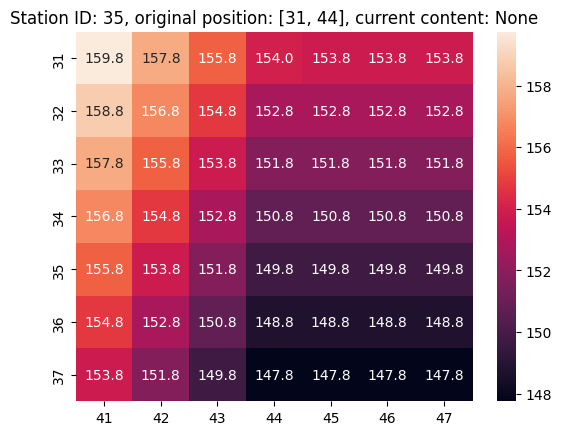

Neighbors:
Station ID: 0, Pos: [20, 4], Distance: 89.13 at Angle 72.0
Station ID: 14, Pos: [124, 42], Distance: 75.13 at Angle 113.0
Station ID: 44, Pos: [127, 39], Distance: 73.37 at Angle 108.0
Station ID: 35, Pos: [34, 44], Distance: 78.30 at Angle 245.0
Average closest coords: [[80, 24], [79, 24], [78, 24], [80, 23]]


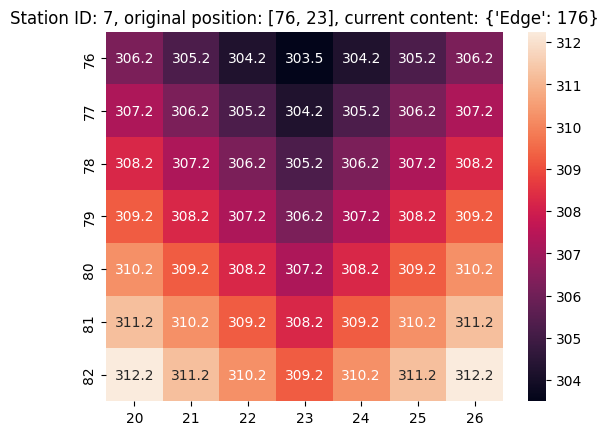

Neighbors:
Station ID: 7, Pos: [79, 23], Distance: 89.13 at Angle 108.0
Average closest coords: [[21, 5], [21, 4], [20, 5], [21, 3]]


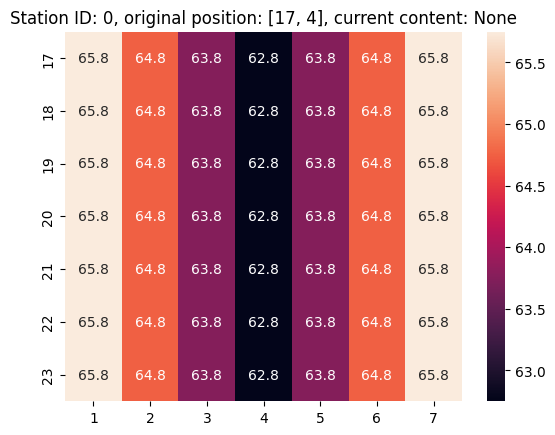

Neighbors:
Station ID: 50, Pos: [96, 77], Distance: 92.50 at Angle 47.0
Average closest coords: [[60, 111], [59, 111], [60, 112], [58, 111]]


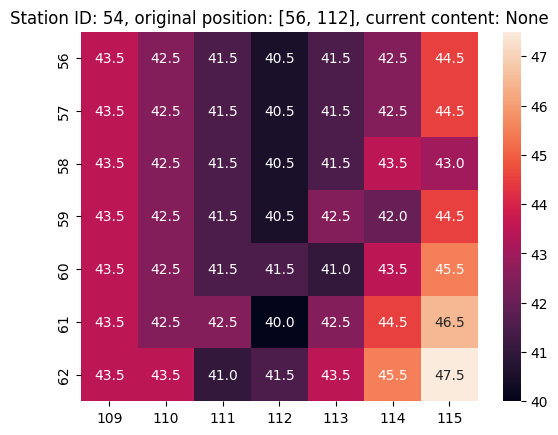

Neighbors:
Station ID: 14, Pos: [124, 42], Distance: 7.76 at Angle 225.0
Station ID: 7, Pos: [79, 23], Distance: 73.37 at Angle 72.0
Average closest coords: [[126, 38], [126, 40], [126, 39], [127, 38]]


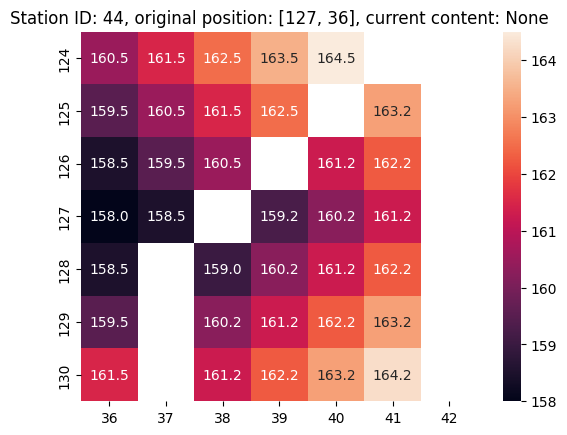

Neighbors:
Station ID: 35, Pos: [34, 44], Distance: 89.75 at Angle 39.0
Average closest coords: [[3, 82], [2, 82], [3, 83], [1, 82]]


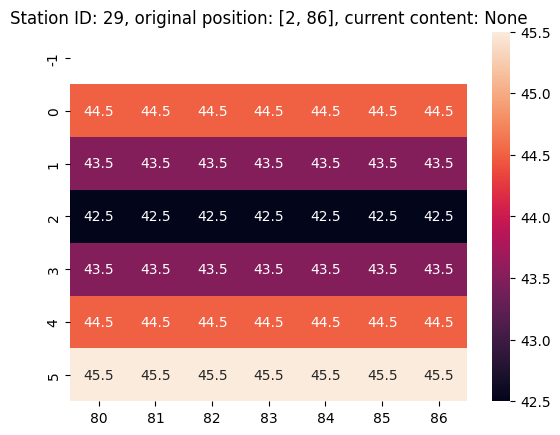

Neighbors:
Station ID: 14, Pos: [124, 42], Distance: 62.10 at Angle 262.0
Average closest coords: [[174, 36], [175, 36], [174, 35], [174, 34]]


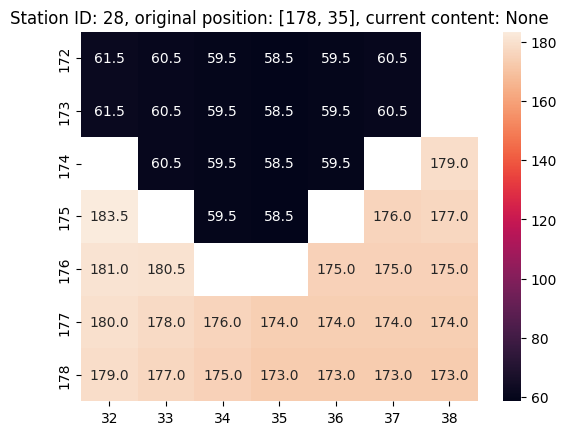

Neighbors:
Station ID: 50, Pos: [96, 77], Distance: 54.20 at Angle 66.0
Average closest coords: [[127, 90], [128, 90], [127, 91], [129, 90]]


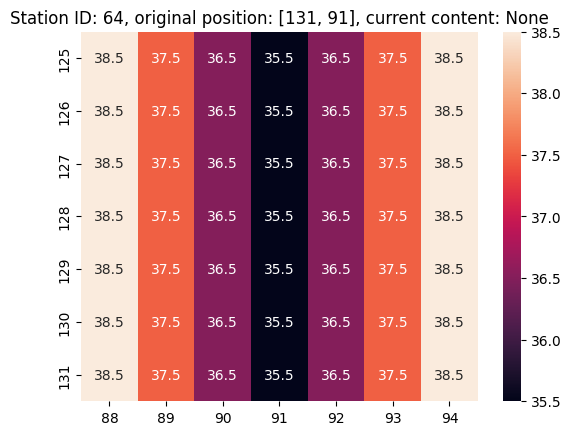

Neighbors:
Station ID: 44, Pos: [127, 39], Distance: 7.76 at Angle 45.0
Station ID: 7, Pos: [79, 23], Distance: 75.13 at Angle 67.0
Station ID: 26, Pos: [230, 96], Distance: 191.63 at Angle 117.0
Station ID: 50, Pos: [96, 77], Distance: 79.40 at Angle 219.0
Station ID: 28, Pos: [175, 35], Distance: 62.10 at Angle 82.0
Average closest coords: [[125, 41], [124, 41], [125, 42], [123, 41]]


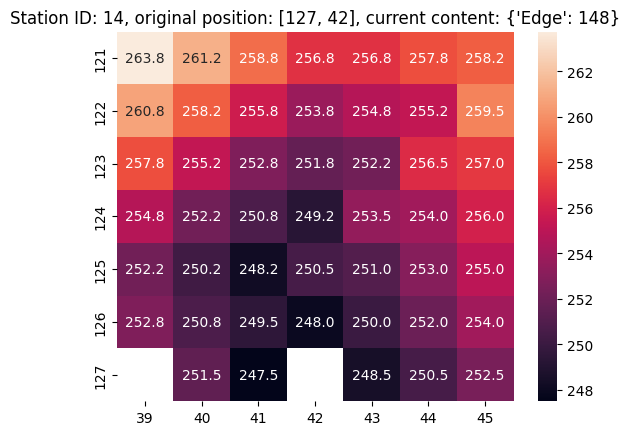

Neighbors:
Station ID: 14, Pos: [124, 42], Distance: 191.63 at Angle 63.0
Average closest coords: [[229, 95], [230, 95], [229, 96], [231, 95]]


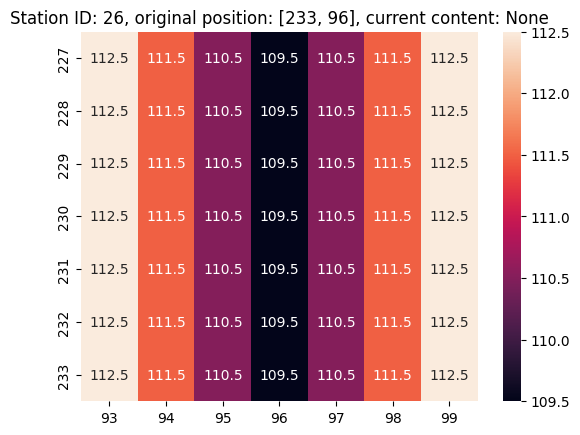

Neighbors:
Station ID: 64, Pos: [128, 91], Distance: 54.20 at Angle 114.0
Station ID: 54, Pos: [59, 112], Distance: 92.50 at Angle 227.0
Station ID: 35, Pos: [34, 44], Distance: 114.33 at Angle 62.0
Station ID: 14, Pos: [124, 42], Distance: 79.40 at Angle 39.0
Average closest coords: [[95, 76], [96, 76], [97, 76], [97, 77]]


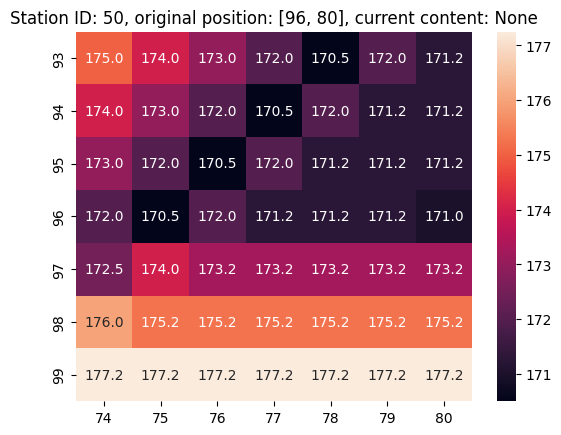

In [15]:
montreal_heatmaps = generate_heatmaps(montreal_data)

Neighbors:
Station ID: 14, Pos: [139, 63], Distance: 16.93 at Angle 241.0
Station ID: 60, Pos: [190, 32], Distance: 83.23 at Angle 58.0
Station ID: 11, Pos: [130, 54], Distance: 24.34 at Angle 77.0
Station ID: 51, Pos: [134, 58], Distance: 14.00 at Angle 270.0
Average closest coords: [[147, 57], [147, 58], [148, 57], [147, 59]]


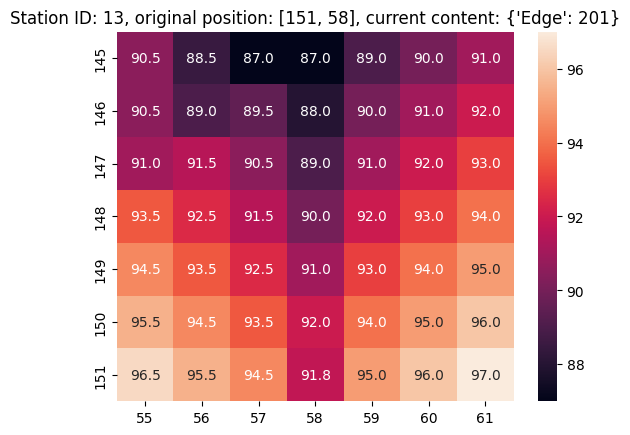

Neighbors:
Station ID: 20, Pos: [64, 5], Distance: 80.40 at Angle 38.0
Station ID: 0, Pos: [5, 52], Distance: 104.44 at Angle 263.0
Station ID: 11, Pos: [130, 54], Distance: 58.62 at Angle 109.0
Station ID: 29, Pos: [99, 49], Distance: 19.10 at Angle 139.0
Average closest coords: [[93, 42], [92, 42], [91, 42], [93, 41]]


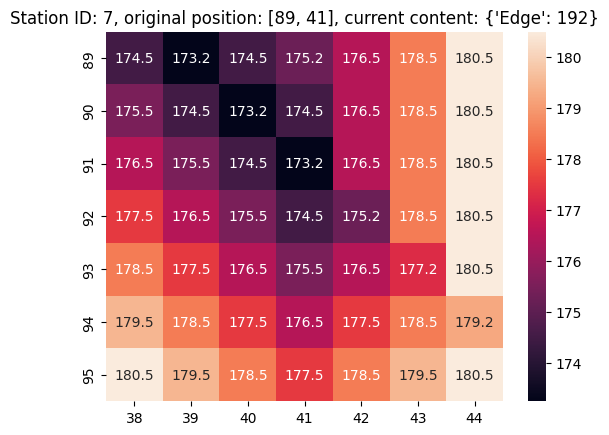

Neighbors:
Station ID: 15, Pos: [131, 67], Distance: 24.27 at Angle 132.0
Station ID: 51, Pos: [134, 58], Distance: 13.00 at Angle 90.0
Station ID: 29, Pos: [99, 49], Distance: 36.27 at Angle 68.0
Station ID: 11, Pos: [130, 54], Distance: 15.34 at Angle 66.0
Average closest coords: [[122, 57], [122, 58], [121, 57], [122, 59]]


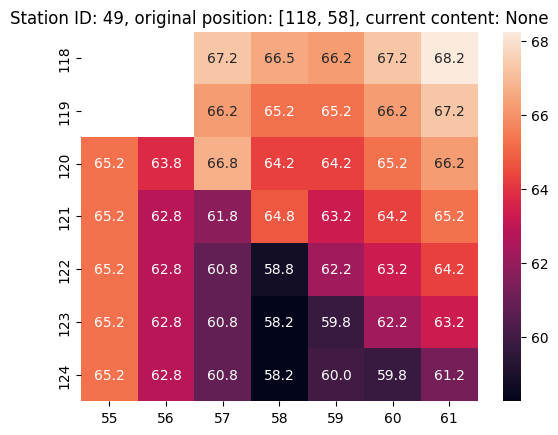

Neighbors:
Station ID: 13, Pos: [148, 58], Distance: 16.93 at Angle 61.0
Station ID: 15, Pos: [131, 67], Distance: 14.34 at Angle 243.0
Station ID: 51, Pos: [134, 58], Distance: 12.93 at Angle 45.0
Station ID: 66, Pos: [155, 68], Distance: 23.93 at Angle 107.0
Average closest coords: [[138, 62], [139, 62], [140, 62], [140, 63]]


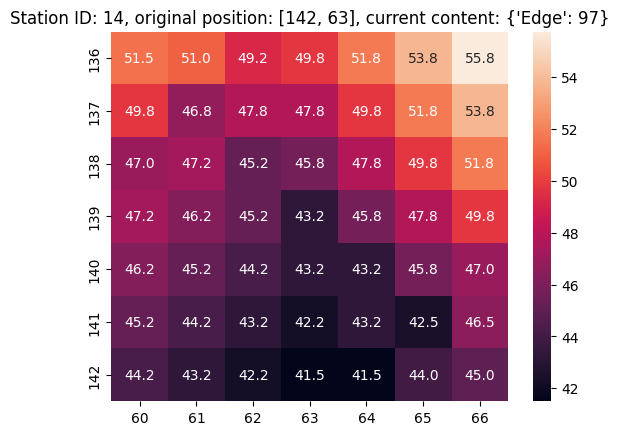

Neighbors:
Station ID: 7, Pos: [92, 41], Distance: 80.40 at Angle 142.0
Average closest coords: [[65, 6], [65, 5], [64, 6], [65, 4]]


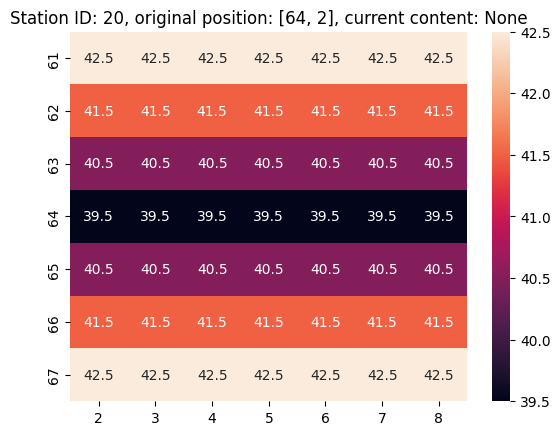

Neighbors:
Station ID: 29, Pos: [99, 49], Distance: 52.79 at Angle 63.0
Average closest coords: [[71, 63], [70, 63], [71, 64], [69, 63]]


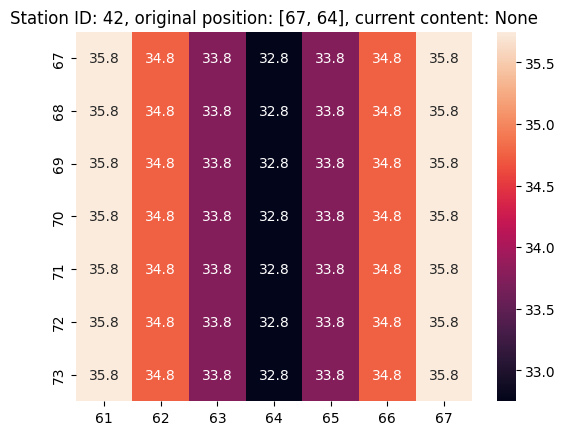

Neighbors:
Station ID: 11, Pos: [130, 54], Distance: 36.03 at Angle 215.0
Average closest coords: [[141, 38], [142, 38], [141, 37], [141, 36]]


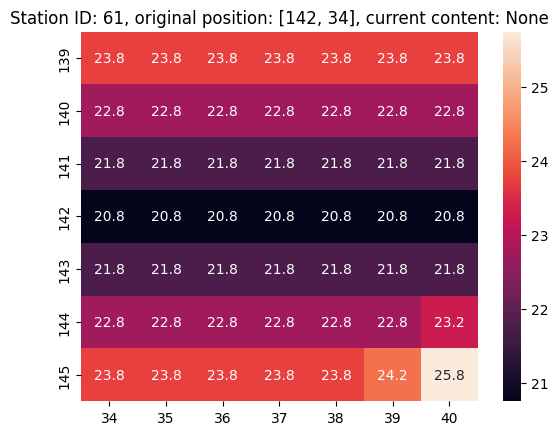

Neighbors:
Station ID: 66, Pos: [155, 68], Distance: 45.10 at Angle 258.0
Average closest coords: [[188, 62], [189, 62], [188, 61], [188, 60]]


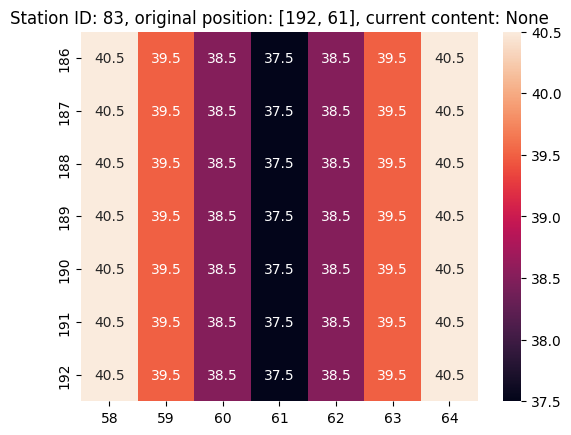

Neighbors:
Station ID: 14, Pos: [139, 63], Distance: 14.34 at Angle 63.0
Station ID: 18, Pos: [121, 77], Distance: 25.86 at Angle 225.0
Station ID: 49, Pos: [121, 58], Distance: 24.27 at Angle 48.0
Station ID: 66, Pos: [155, 68], Distance: 25.59 at Angle 92.0
Average closest coords: [[130, 66], [131, 66], [132, 66], [132, 67]]


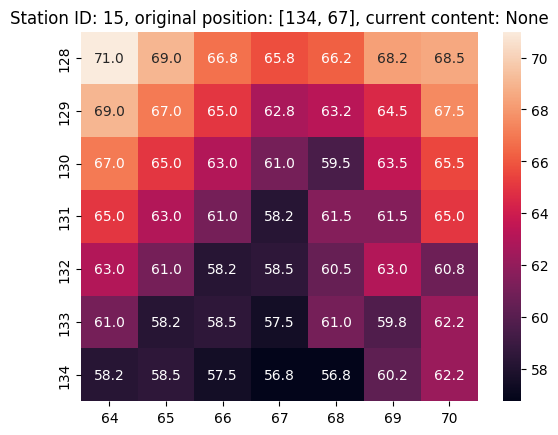

Neighbors:
Station ID: 13, Pos: [148, 58], Distance: 83.23 at Angle 238.0
Average closest coords: [[189, 33], [190, 33], [189, 32], [189, 31]]


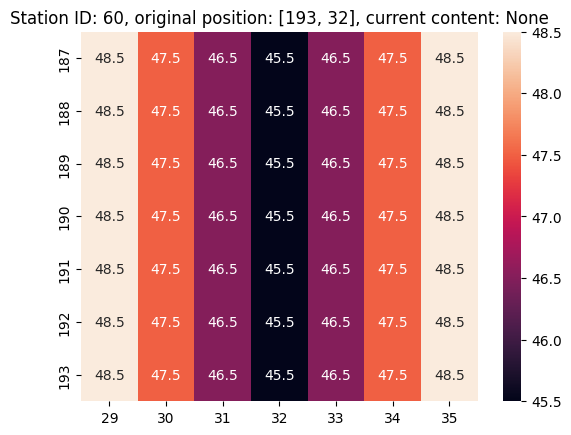

Neighbors:
Station ID: 18, Pos: [121, 77], Distance: 24.27 at Angle 42.0
Average closest coords: [[129, 86], [130, 86], [129, 87], [131, 86]]


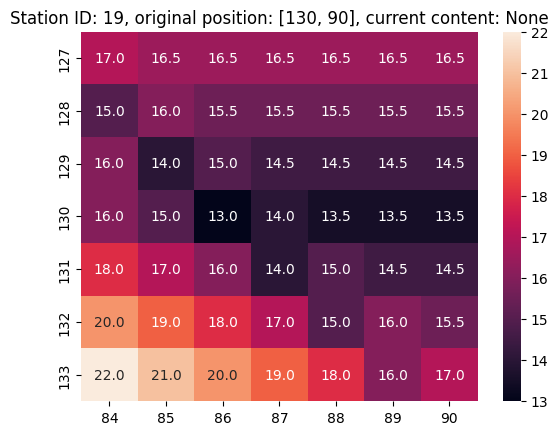

Neighbors:
Station ID: 18, Pos: [121, 77], Distance: 77.13 at Angle 68.0
Average closest coords: [[167, 95], [168, 95], [167, 96], [169, 95]]


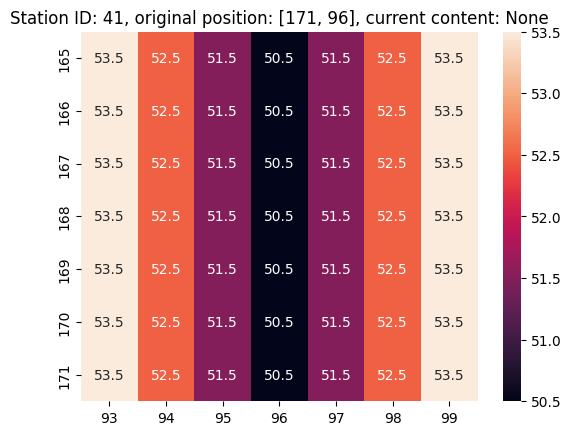

Neighbors:
Station ID: 18, Pos: [121, 77], Distance: 62.89 at Angle 142.0
Station ID: 42, Pos: [70, 64], Distance: 52.79 at Angle 243.0
Station ID: 49, Pos: [121, 58], Distance: 36.27 at Angle 112.0
Station ID: 7, Pos: [92, 41], Distance: 19.10 at Angle 41.0
Average closest coords: [[100, 50], [99, 50], [98, 50], [100, 49]]


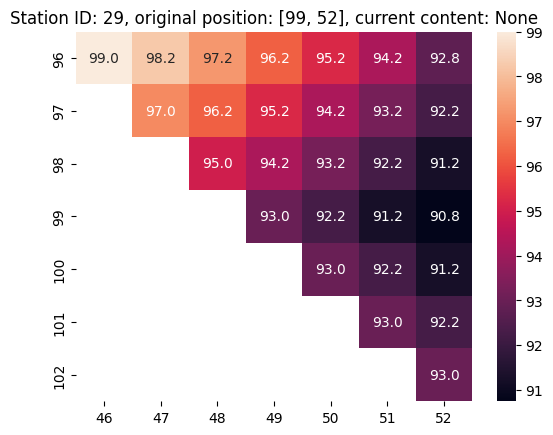

Neighbors:
Station ID: 7, Pos: [92, 41], Distance: 104.44 at Angle 83.0
Average closest coords: [[6, 51], [5, 51], [6, 52], [4, 51]]


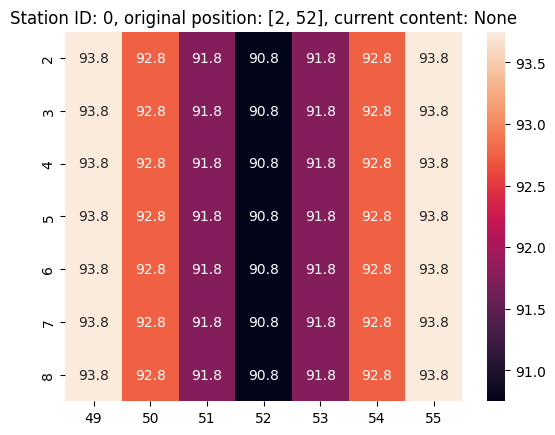

Neighbors:
Station ID: 83, Pos: [189, 61], Distance: 45.10 at Angle 78.0
Station ID: 76, Pos: [230, 112], Distance: 144.77 at Angle 120.0
Station ID: 15, Pos: [131, 67], Distance: 25.59 at Angle 88.0
Station ID: 14, Pos: [139, 63], Distance: 23.93 at Angle 73.0
Average closest coords: [[154, 67], [155, 67], [156, 67], [156, 68]]


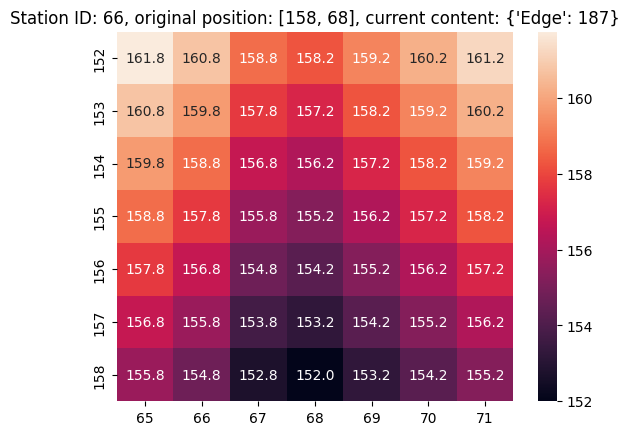

Neighbors:
Station ID: 11, Pos: [130, 54], Distance: 10.34 at Angle 45.0
Station ID: 14, Pos: [139, 63], Distance: 12.93 at Angle 135.0
Station ID: 49, Pos: [121, 58], Distance: 13.00 at Angle 270.0
Station ID: 13, Pos: [148, 58], Distance: 14.00 at Angle 90.0
Average closest coords: [[135, 58], [133, 58], [133, 57], [134, 57]]


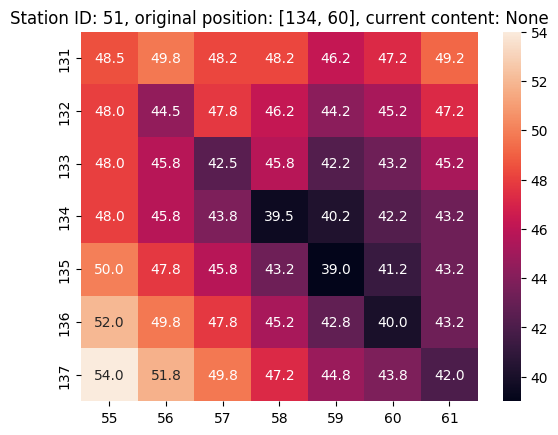

Neighbors:
Station ID: 66, Pos: [155, 68], Distance: 144.77 at Angle 60.0
Average closest coords: [[229, 111], [230, 111], [229, 112], [231, 111]]


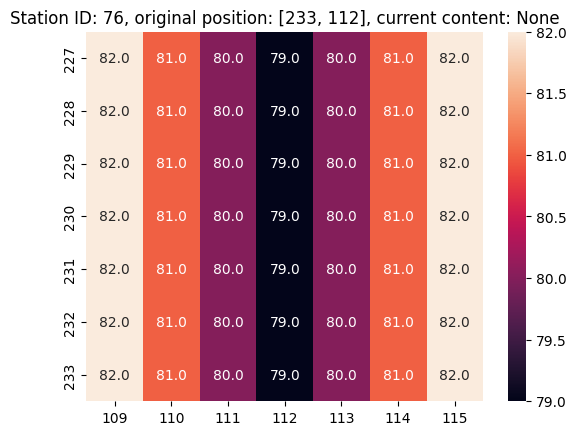

Neighbors:
Station ID: 19, Pos: [130, 87], Distance: 24.27 at Angle 138.0
Station ID: 41, Pos: [168, 96], Distance: 77.13 at Angle 112.0
Station ID: 15, Pos: [131, 67], Distance: 25.86 at Angle 45.0
Station ID: 29, Pos: [99, 49], Distance: 62.89 at Angle 38.0
Average closest coords: [[122, 76], [122, 77], [122, 78], [121, 76]]


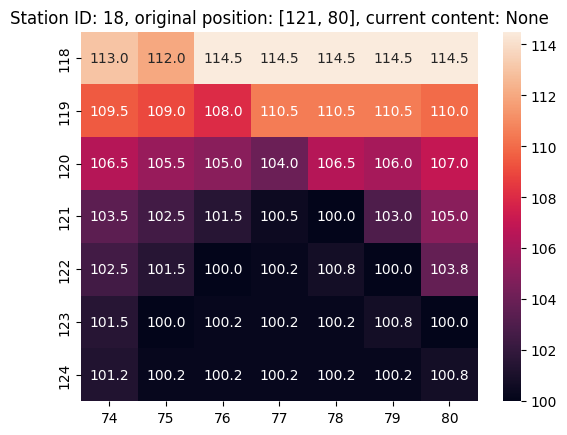

Neighbors:
Station ID: 51, Pos: [134, 58], Distance: 10.34 at Angle 135.0
Station ID: 61, Pos: [142, 37], Distance: 36.03 at Angle 35.0
Station ID: 7, Pos: [92, 41], Distance: 58.62 at Angle 71.0
Station ID: 13, Pos: [148, 58], Distance: 24.34 at Angle 103.0
Station ID: 49, Pos: [121, 58], Distance: 15.34 at Angle 246.0
Average closest coords: [[131, 55], [131, 54], [130, 55], [131, 53]]


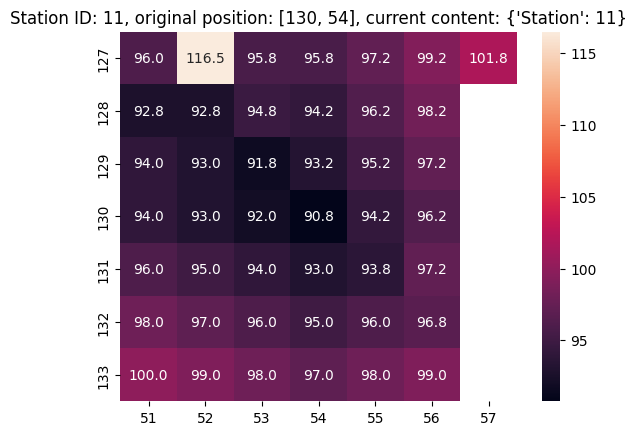

In [16]:
wien_heatmaps = generate_heatmaps(wien_data)

Neighbors:
Station ID: 0, Pos: [146, 44], Distance: 3.59 at Angle 117.0
Station ID: 31, Pos: [127, 46], Distance: 21.76 at Angle 260.0
Station ID: 5, Pos: [87, 106], Distance: 153.39 at Angle 222.0
Station ID: 52, Pos: [149, 38], Distance: 12.93 at Angle 45.0
Average closest coords: [[145, 44], [144, 44], [143, 44], [145, 43]]


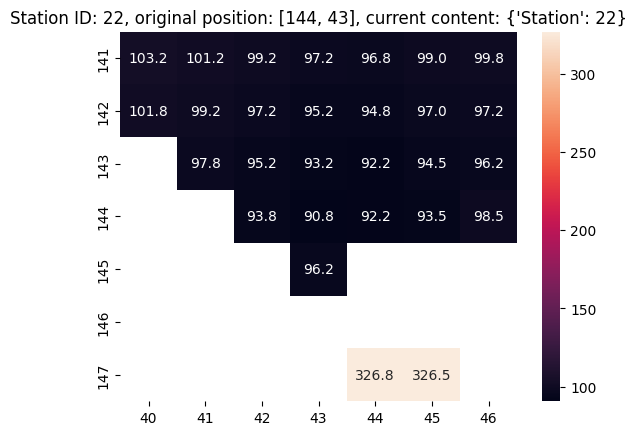

Neighbors:
Station ID: 52, Pos: [149, 38], Distance: 1.00 at Angle 0.0
Station ID: 0, Pos: [146, 44], Distance: 9.76 at Angle 211.0
Average closest coords: [[148, 38], [149, 38], [149, 40], [148, 40]]


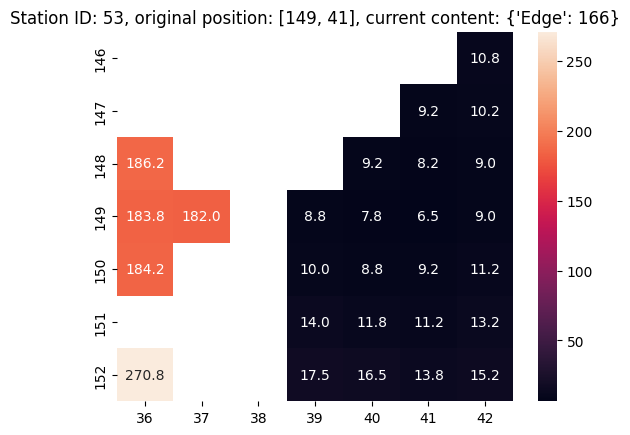

Neighbors:
Station ID: 52, Pos: [149, 38], Distance: 77.47 at Angle 241.0
Average closest coords: [[189, 16], [190, 16], [189, 15], [189, 14]]


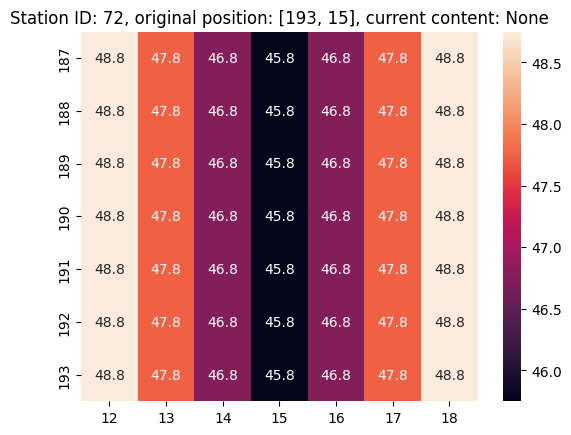

Neighbors:
Station ID: 81, Pos: [136, 17], Distance: 23.51 at Angle 113.0
Average closest coords: [[123, 12], [123, 11], [122, 12], [123, 10]]


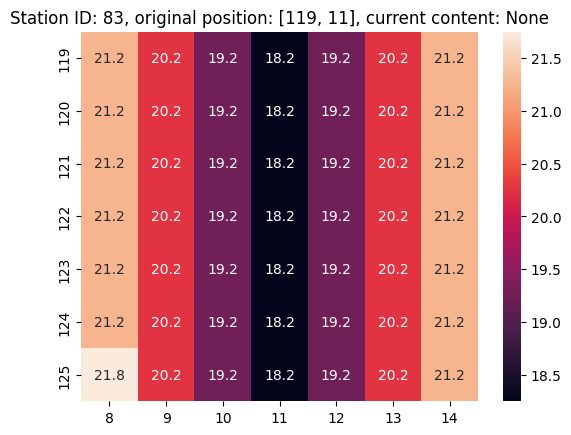

Neighbors:
Station ID: 35, Pos: [164, 63], Distance: 47.03 at Angle 67.0
Average closest coords: [[191, 74], [192, 74], [191, 75], [193, 74]]


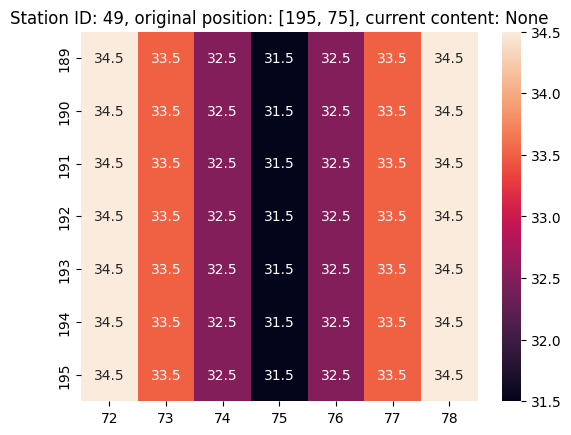

Neighbors:
Station ID: 66, Pos: [230, 40], Distance: 55.59 at Angle 91.0
Station ID: 65, Pos: [215, 53], Distance: 61.20 at Angle 110.0
Station ID: 52, Pos: [149, 38], Distance: 28.59 at Angle 88.0
Average closest coords: [[177, 40], [177, 39], [176, 40], [177, 38]]


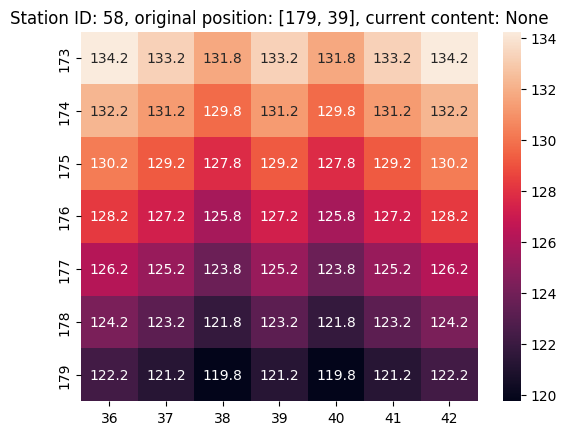

Neighbors:
Station ID: 58, Pos: [176, 39], Distance: 55.59 at Angle 89.0
Average closest coords: [[229, 39], [230, 39], [229, 40], [231, 39]]


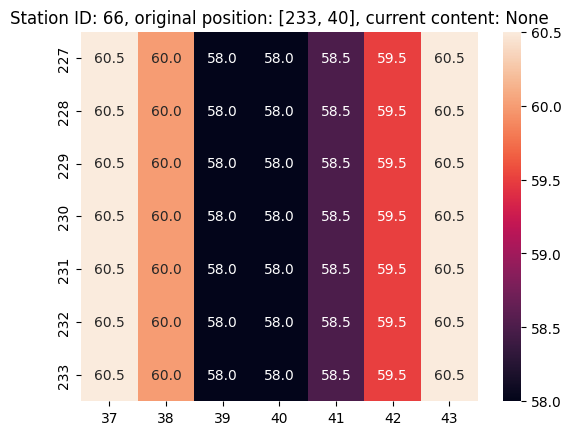

Neighbors:
Station ID: 11, Pos: [70, 40], Distance: 63.86 at Angle 78.0
Average closest coords: [[23, 49], [22, 49], [23, 50], [21, 49]]


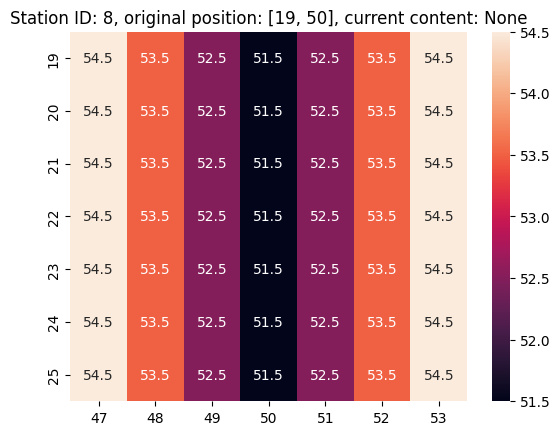

Neighbors:
Station ID: 11, Pos: [70, 40], Distance: 24.17 at Angle 85.0
Station ID: 31, Pos: [127, 46], Distance: 42.34 at Angle 96.0
Average closest coords: [[90, 41], [91, 41], [92, 41], [92, 42]]


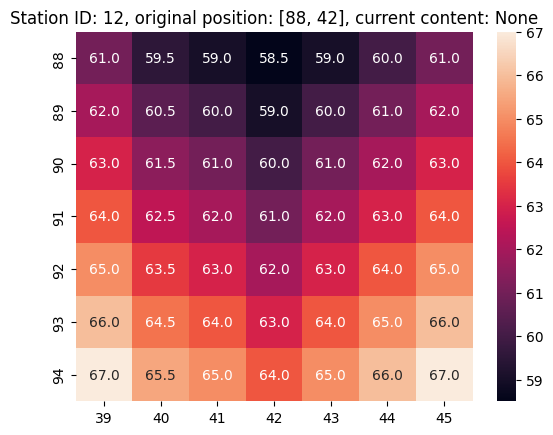

Neighbors:
Station ID: 22, Pos: [144, 43], Distance: 21.76 at Angle 80.0
Station ID: 12, Pos: [91, 42], Distance: 42.34 at Angle 84.0
Station ID: 3, Pos: [138, 35], Distance: 28.44 at Angle 45.0
Average closest coords: [[128, 45], [127, 45], [126, 45], [128, 46]]


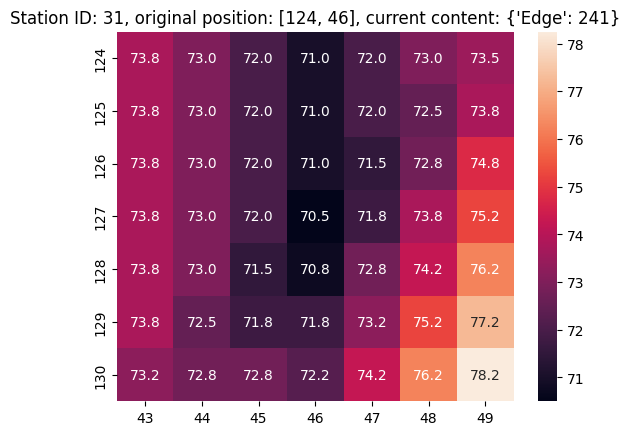

Neighbors:
Station ID: 12, Pos: [91, 42], Distance: 24.17 at Angle 95.0
Station ID: 8, Pos: [22, 50], Distance: 63.86 at Angle 258.0
Station ID: 96, Pos: [11, 109], Distance: 162.56 at Angle 221.0
Average closest coords: [[69, 41], [70, 41], [71, 41], [69, 40]]


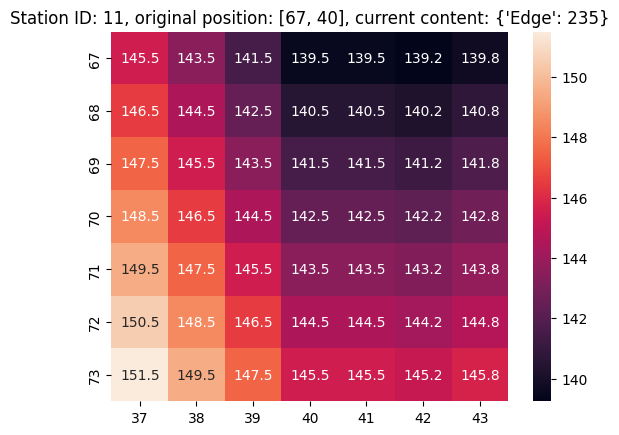

Neighbors:
Station ID: 0, Pos: [146, 44], Distance: 5.59 at Angle 14.0
Station ID: 35, Pos: [164, 63], Distance: 40.79 at Angle 131.0
Average closest coords: [[146, 47], [147, 47], [148, 47], [148, 48]]


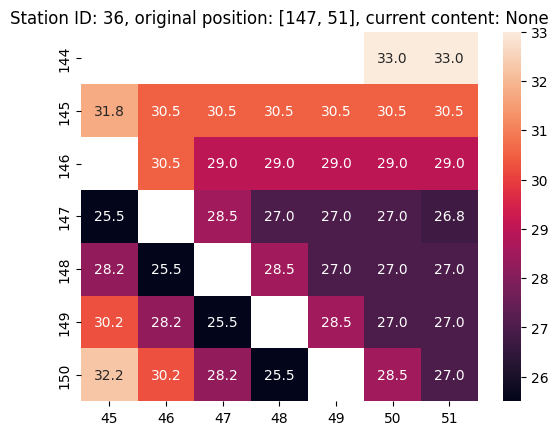

Neighbors:
Station ID: 58, Pos: [176, 39], Distance: 61.20 at Angle 70.0
Average closest coords: [[214, 52], [215, 52], [214, 53], [216, 52]]


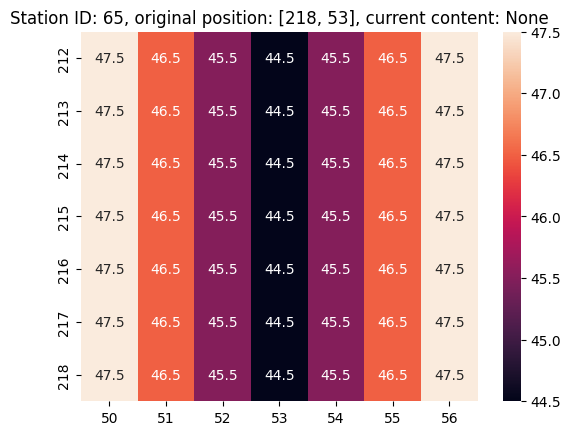

Neighbors:
Station ID: 35, Pos: [164, 63], Distance: 54.79 at Angle 26.0
Average closest coords: [[150, 93], [149, 93], [150, 94], [148, 93]]


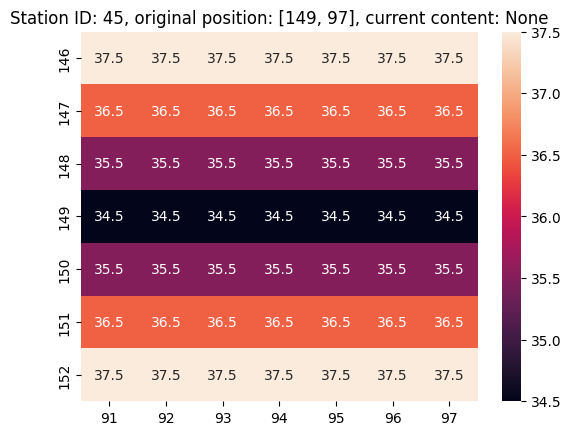

Neighbors:
Station ID: 3, Pos: [138, 35], Distance: 15.76 at Angle 75.0
Station ID: 53, Pos: [149, 39], Distance: 1.00 at Angle 180.0
Station ID: 72, Pos: [190, 15], Distance: 77.47 at Angle 61.0
Station ID: 22, Pos: [144, 43], Distance: 12.93 at Angle 225.0
Station ID: 58, Pos: [176, 39], Distance: 28.59 at Angle 92.0
Average closest coords: [[149, 39], [150, 39], [148, 39], [149, 37]]


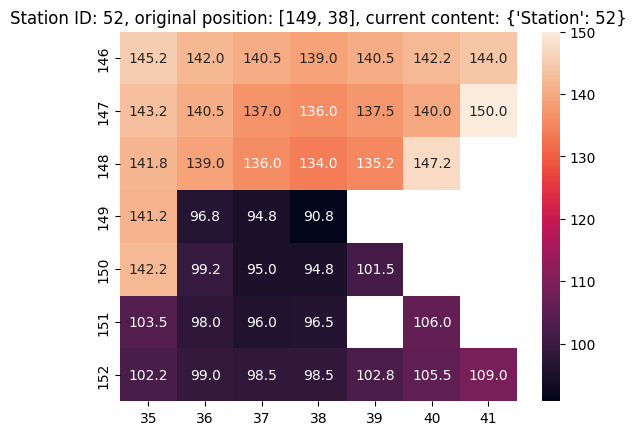

Neighbors:
Station ID: 81, Pos: [136, 17], Distance: 21.51 at Angle 153.0
Average closest coords: [[131, 6], [131, 5], [130, 6], [131, 4]]


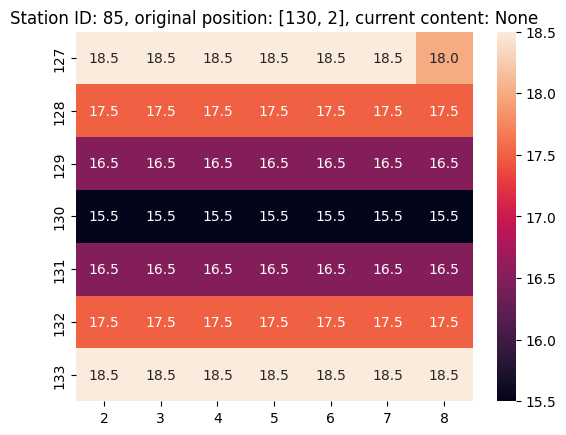

Neighbors:
Station ID: 22, Pos: [144, 43], Distance: 3.59 at Angle 63.0
Station ID: 53, Pos: [149, 39], Distance: 9.76 at Angle 31.0
Station ID: 36, Pos: [147, 48], Distance: 5.59 at Angle 166.0
Station ID: 35, Pos: [164, 63], Distance: 47.54 at Angle 137.0
Average closest coords: [[147, 43], [147, 44], [147, 45], [146, 43]]


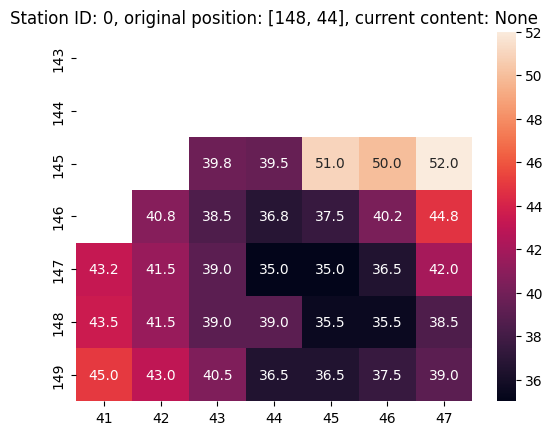

Neighbors:
Station ID: 85, Pos: [130, 5], Distance: 21.51 at Angle 27.0
Station ID: 3, Pos: [138, 35], Distance: 21.17 at Angle 174.0
Station ID: 83, Pos: [122, 11], Distance: 23.51 at Angle 67.0
Average closest coords: [[135, 16], [136, 16], [135, 17], [137, 16]]


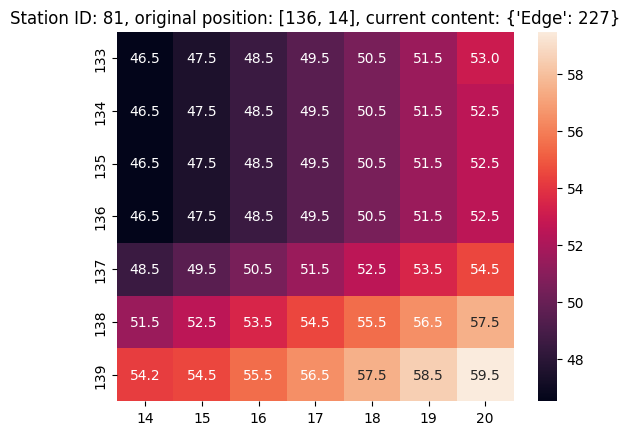

Neighbors:
Station ID: 0, Pos: [146, 44], Distance: 47.54 at Angle 43.0
Station ID: 45, Pos: [149, 94], Distance: 54.79 at Angle 206.0
Station ID: 36, Pos: [147, 48], Distance: 40.79 at Angle 49.0
Station ID: 49, Pos: [192, 75], Distance: 47.03 at Angle 113.0
Average closest coords: [[163, 62], [163, 64], [163, 63], [164, 62]]


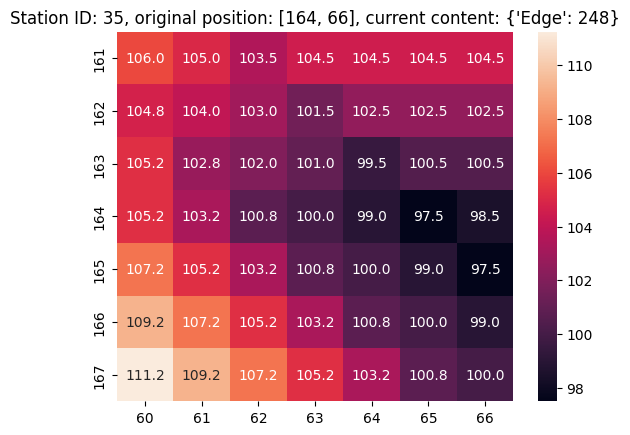

Neighbors:
Station ID: 52, Pos: [149, 38], Distance: 15.76 at Angle 105.0
Station ID: 81, Pos: [136, 17], Distance: 21.17 at Angle 6.0
Station ID: 31, Pos: [127, 46], Distance: 28.44 at Angle 225.0
Average closest coords: [[137, 36], [138, 36], [137, 35], [137, 34]]


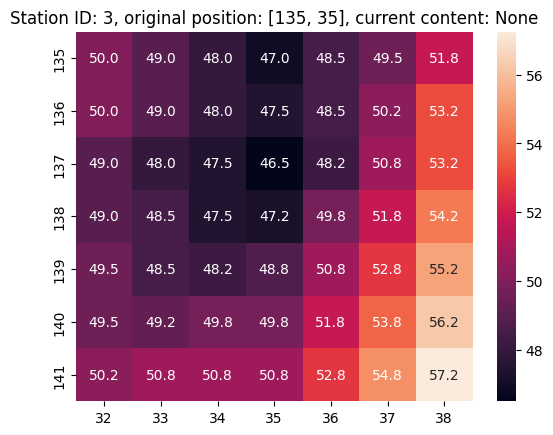

Neighbors:
Station ID: 22, Pos: [144, 43], Distance: 153.39 at Angle 42.0
Average closest coords: [[88, 105], [87, 105], [88, 106], [86, 105]]


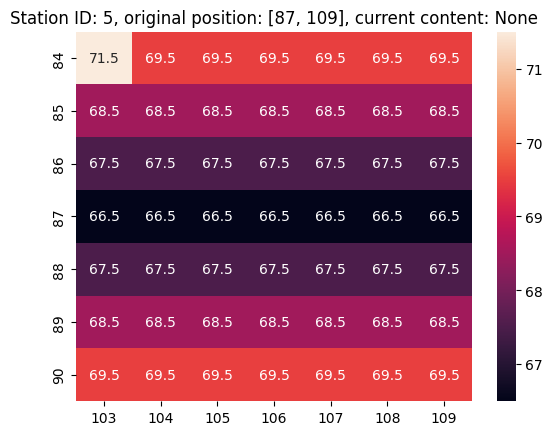

Neighbors:
Station ID: 11, Pos: [70, 40], Distance: 162.56 at Angle 41.0
Average closest coords: [[12, 108], [11, 108], [12, 109], [10, 108]]


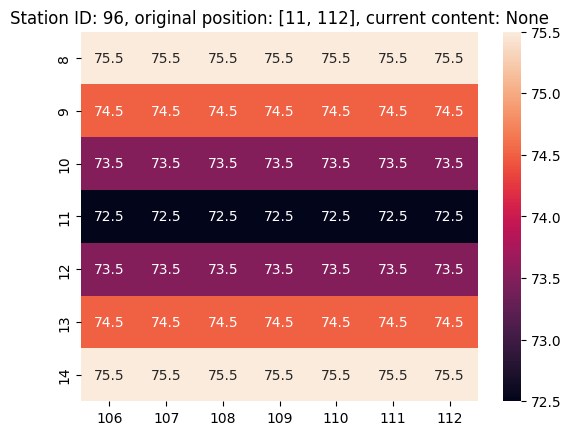

In [17]:
washington_heatmaps = generate_heatmaps(washington_data)

In [18]:
from functools import reduce

def heatmap_summary(city, *heatmaps):
    if not isinstance(city, str):
        heatmaps = [city] + list(heatmaps)
        city = None

    heatmaps = list(map(lambda df: df.fillna(df.mean(axis=None)).sub(df.min(axis=None)).div(df.max(axis=None)-df.min(axis=None)).add(1).mul(10), heatmaps))
    total_heatmap = reduce(
        lambda a, b: a.add(b),
        [heatmap.set_axis([1, 2, 3, 4, 5, 6, 7], axis=0).set_axis([1, 2, 3, 4, 5, 6, 7], axis=1) for heatmap in heatmaps],
        DataFrame(np.zeros((7, 7))).set_axis([1, 2, 3, 4, 5, 6, 7], axis=0).set_axis([1, 2, 3, 4, 5, 6, 7], axis=1)
    )
    total_heatmap = total_heatmap.div(len(heatmaps))

    sns.heatmap(total_heatmap, annot=True, fmt=".2f")
    plt.title('Average of all heatmaps' if city is None else f'Average of all heatmaps of {city}')
    plt.show()
    return total_heatmap

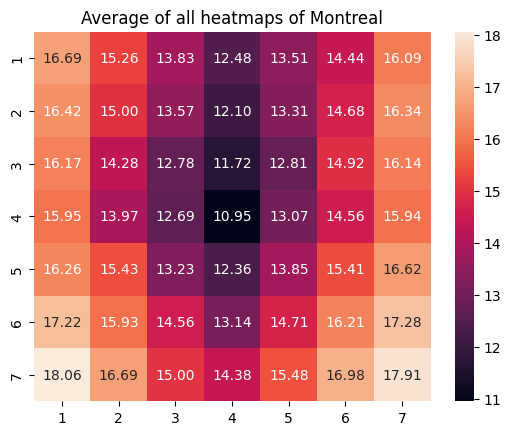

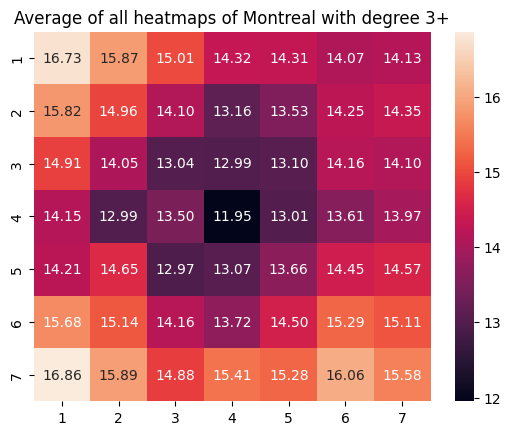

In [20]:
montreal_summary = heatmap_summary("Montreal", *[h[0] for h in montreal_heatmaps])
_ = heatmap_summary("Montreal with degree 3+", *[h[0] for h in montreal_heatmaps if h[1] > 1])

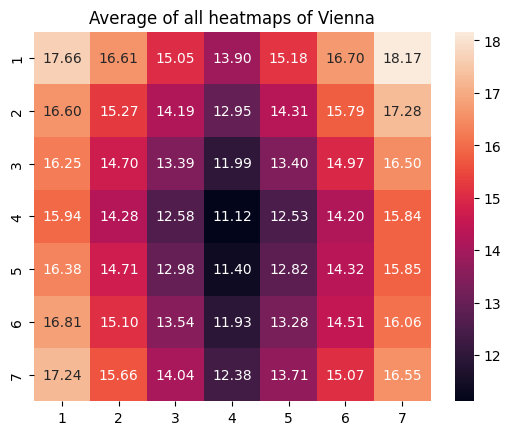

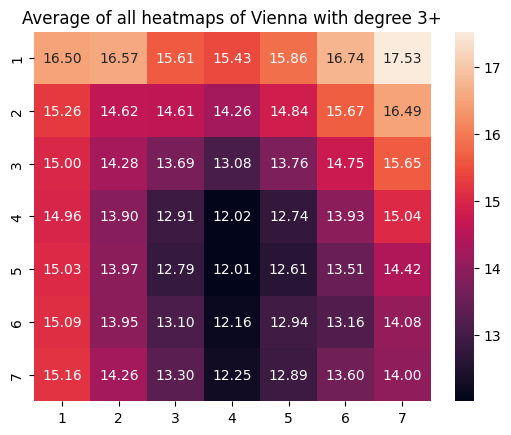

In [21]:
wien_summary = heatmap_summary("Vienna", *[h[0] for h in wien_heatmaps])
_ = heatmap_summary("Vienna with degree 3+", *[h[0] for h in wien_heatmaps if h[1] > 1])

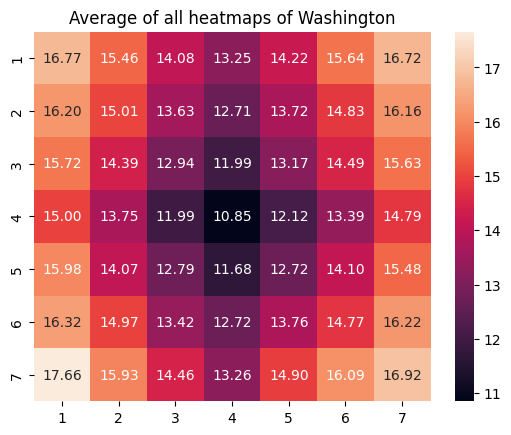

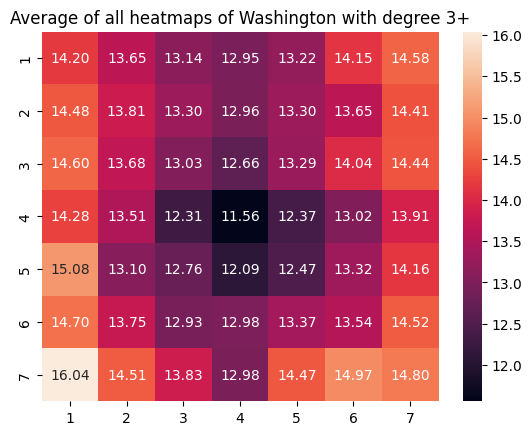

In [22]:
washington_summary = heatmap_summary("Washington", *[h[0] for h in washington_heatmaps])
_ = heatmap_summary("Washington with degree 3+", *[h[0] for h in washington_heatmaps if h[1] > 1])

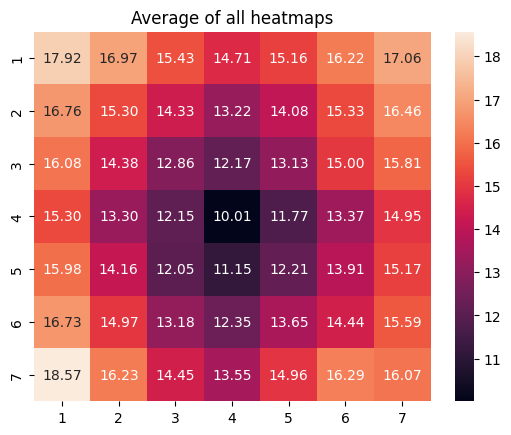

In [ ]:
_ = heatmap_summary(montreal_summary, wien_summary, washington_summary)